# **Import Necessary Libraries & Data Preparation**



In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U -q PyDrive2
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Load data into pandas dataframe
plt.style.use('ggplot')
link = 'https://drive.google.com/file/d/172Sh05ui1TNvF0sds1yTIZGgl99zLq6q/view'
id = link.split('/')[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('wine-data.csv')
wine_df = pd.read_csv('wine-data.csv')
wine_df

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015.0,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014.0,Château Lauretan
2,14.3,Red,US,"Dark and musky, this is an unabashedly earthy ...",Reserve,50.0,85,Oregon,Southern Oregon,Southern Oregon,Troon 2014 Reserve G-S-M (Southern Oregon),https://www.winemag.com/buying-guide/troon-201...,G-S-M,2014.0,Troon
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013.0,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014.0,Narmada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15455,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015.0,Netzl
15456,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014.0,Napa Cellars
15457,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014.0,Millbrook
15458,13.0,Rose,France,"Red-berry fruits dominate this crisp, clear wi...",Frais et Délicat,13.0,88,Provence,Coteaux d'Aix-en-Provence,NaN,Moncigale 2015 Frais et Délicat Rosé (Coteaux ...,https://www.winemag.com/buying-guide/moncigale...,Rosé,2015.0,Moncigale


In [3]:
# Column Data Types
wine_df.dtypes

,0
alcohol,float64
category,object
country,object
description,object
designation,object
price,float64
rating,int64
region,object
subregion,object
subsubregion,object


In [4]:
# Rating Column Summary Statistics
wine_df[['rating']].describe()

,rating
count,15460.000000
mean,89.130854
std,2.807311
min,80.000000
25%,87.000000
50%,89.000000
75%,91.000000
max,100.000000


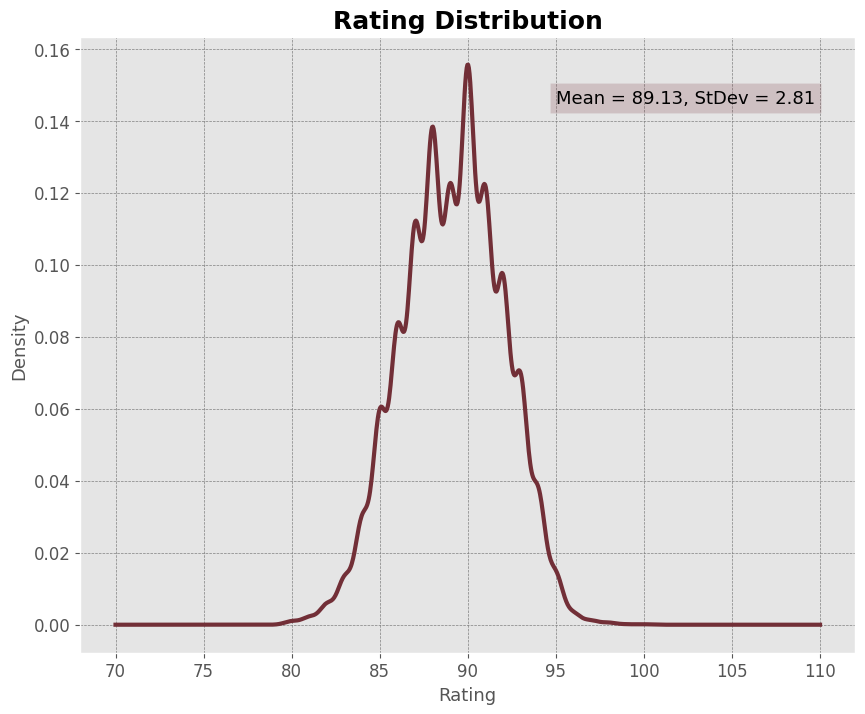

In [5]:
# Rating Distribution Plot
plt.figure(figsize=(10,8))
wine_df['rating'].plot.kde(linewidth=3, color='#722F37')
plt.title("Rating Distribution", fontsize=18, fontweight='bold')
plt.text(95, 0.145, r'Mean = 89.13, StDev = 2.81', fontsize=13, bbox = dict(facecolor = '#722F37', alpha = 0.2))
plt.xlabel("Rating", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()

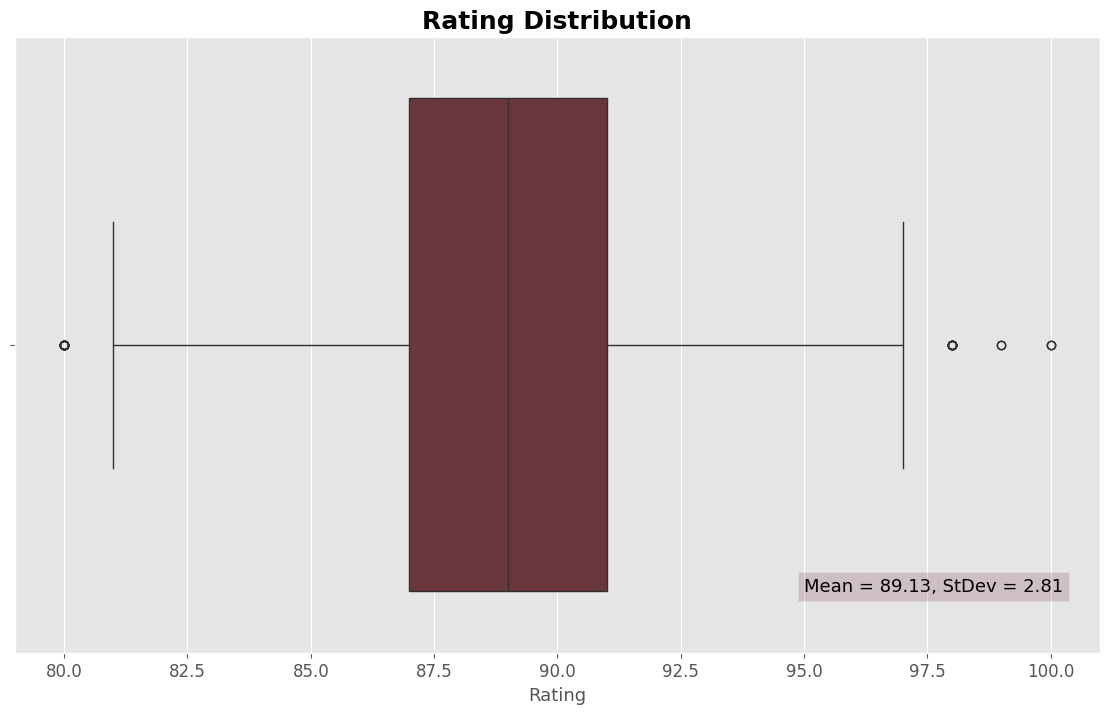

In [6]:
# Rating Distribution Plot (Boxplot)
plt.figure(figsize=(14,8))
sns.boxplot(x=wine_df['rating'], vert=False, color='#722F37')
plt.title("Rating Distribution", fontsize=18, fontweight='bold')
plt.text(95,0.4, r'Mean = 89.13, StDev = 2.81', fontsize=13, bbox = dict(facecolor = '#722F37', alpha = 0.2))
plt.xlabel("Rating", fontsize=13)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
plt.gca().margins(x=0.05)
plt.show()

#**Rating vs. Price Analysis**

In [7]:
# Create separate dataframe for Rating vs. Price Analysis
price_df = wine_df.copy(deep=True)
price_df = price_df.dropna(subset=['price']).reset_index(drop=True)
price_df

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015.0,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014.0,Château Lauretan
2,14.3,Red,US,"Dark and musky, this is an unabashedly earthy ...",Reserve,50.0,85,Oregon,Southern Oregon,Southern Oregon,Troon 2014 Reserve G-S-M (Southern Oregon),https://www.winemag.com/buying-guide/troon-201...,G-S-M,2014.0,Troon
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013.0,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014.0,Narmada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,14.5,Red,US,"An extremely, deep, almost black color is the ...",The One Black,15.0,89,California,North Coast,North Coast,Noble Vines 2013 The One Black Red (North Coast),https://www.winemag.com/buying-guide/noble-vin...,Red Blend,2013.0,Noble Vines
14896,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015.0,Netzl
14897,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014.0,Napa Cellars
14898,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014.0,Millbrook


In [8]:
# Price Column Summary Statistics
price_df[['price']].describe()

,price
count,14900.000000
mean,38.156103
std,42.603227
min,4.000000
25%,18.000000
50%,28.000000
75%,45.000000
max,1000.000000


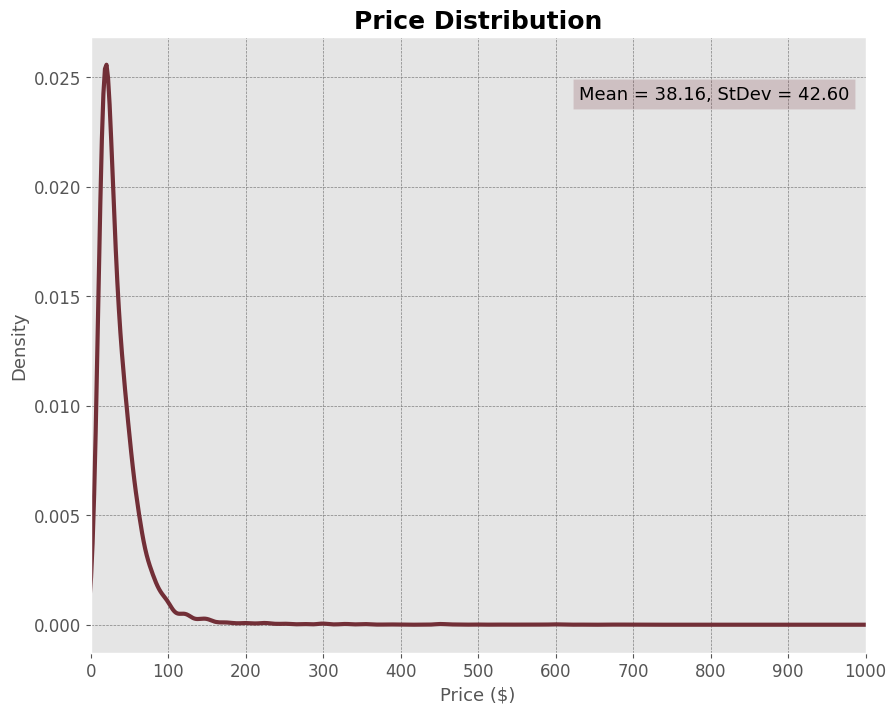

In [9]:
# Price Distribution Plot
plt.figure(figsize=(10,8))
price_df['price'].plot.kde(linewidth=3, color='#722F37')
plt.title("Price Distribution", fontsize=18, fontweight='bold')
plt.text(630, 0.024, r'Mean = 38.16, StDev = 42.60', fontsize=13, bbox = dict(facecolor = '#722F37', alpha = 0.2))
plt.xlabel("Price ($)", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.xlim([0, 1000])
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()

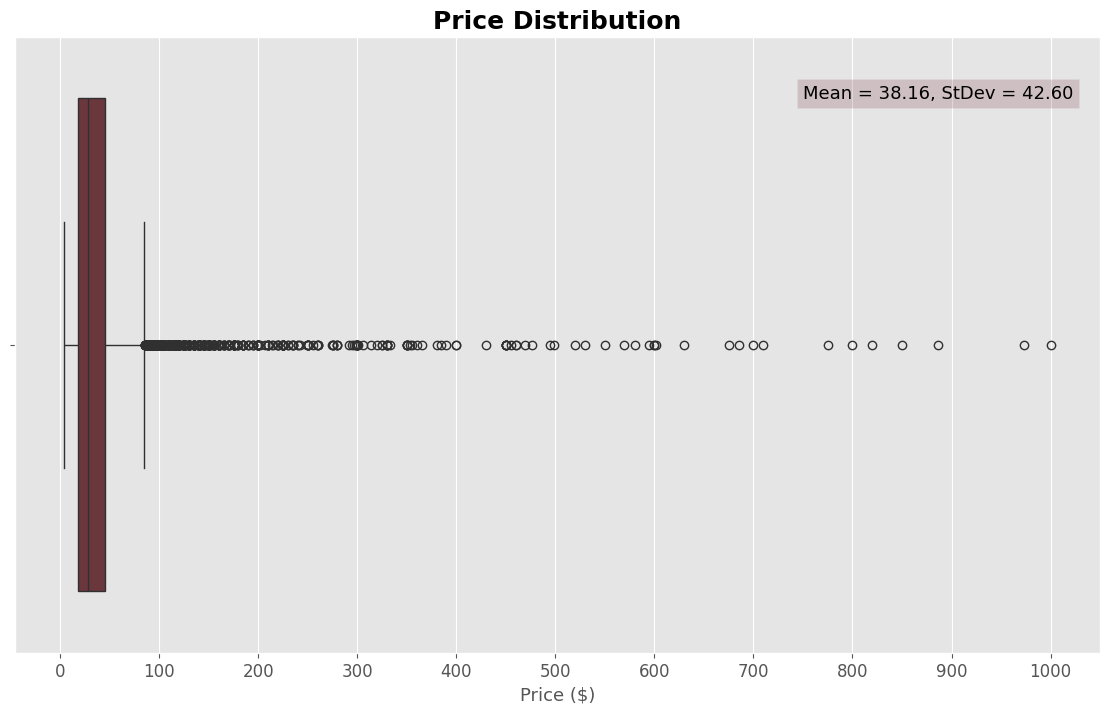

In [10]:
# Price Distribution Plot (Boxplot)
plt.figure(figsize=(14,8))
sns.boxplot(x=price_df['price'], vert=False, color='#722F37')
plt.title("Price Distribution", fontsize=18, fontweight='bold')
plt.text(750,-0.4, r'Mean = 38.16, StDev = 42.60', fontsize=13, bbox = dict(facecolor = '#722F37', alpha = 0.2))
plt.xlabel("Price ($)", fontsize=13)
plt.xticks(np.arange(0,1200,100), fontsize=12)
plt.yticks(fontsize=12)
plt.gca().margins(x=0.05)
plt.show()

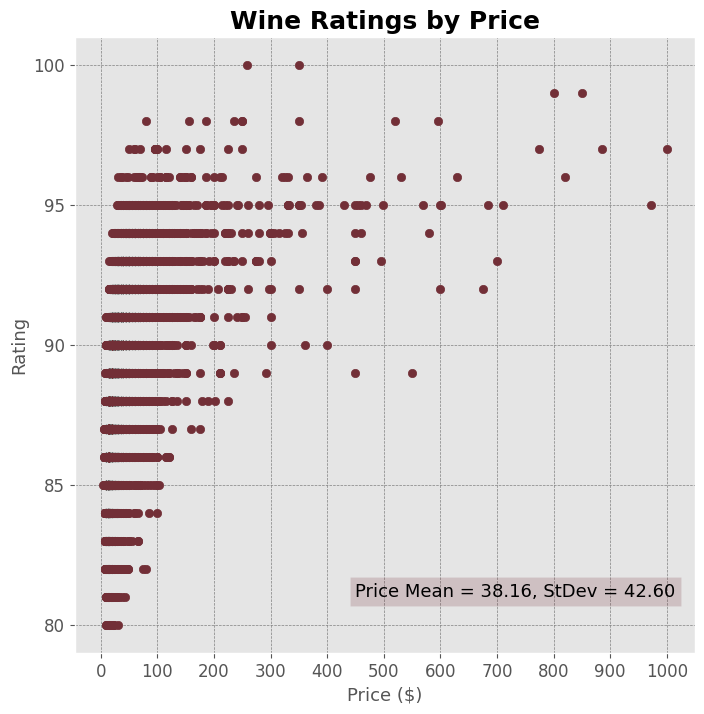

In [11]:
# Price By Rating Scatterplot
plt.figure(figsize=(8,8))
plt.scatter(x = price_df['price'], y = price_df['rating'], color='#722F37')
plt.title("Wine Ratings by Price", fontsize=18, fontweight='bold')
plt.text(450,81, r'Price Mean = 38.16, StDev = 42.60', fontsize=13, bbox = dict(facecolor = '#722F37', alpha = 0.2))
plt.xlabel("Price ($)", fontsize=13)
plt.ylabel("Rating", fontsize=13)
plt.yticks(np.arange(80,101,5),fontsize=12)
plt.xticks(np.arange(0,1100,100),fontsize=12)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.gca().margins(x=0.05, y=0.05)
plt.show()

#**Rating vs. Vintage Analysis**

In [12]:
# Create separate dataframe for Rating vs. Vintage Analysis
vintage_df = wine_df.copy(deep=True)
vintage_df = vintage_df.dropna(subset=['vintage']).reset_index(drop=True)
vintage_df

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015.0,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014.0,Château Lauretan
2,14.3,Red,US,"Dark and musky, this is an unabashedly earthy ...",Reserve,50.0,85,Oregon,Southern Oregon,Southern Oregon,Troon 2014 Reserve G-S-M (Southern Oregon),https://www.winemag.com/buying-guide/troon-201...,G-S-M,2014.0,Troon
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013.0,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014.0,Narmada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015.0,Netzl
14931,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014.0,Napa Cellars
14932,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014.0,Millbrook
14933,13.0,Rose,France,"Red-berry fruits dominate this crisp, clear wi...",Frais et Délicat,13.0,88,Provence,Coteaux d'Aix-en-Provence,NaN,Moncigale 2015 Frais et Délicat Rosé (Coteaux ...,https://www.winemag.com/buying-guide/moncigale...,Rosé,2015.0,Moncigale


In [13]:
# Vintage Column Summary Statistics
vintage_df['vintage'].value_counts(dropna=False)

,count
vintage,
2014.0,4978
2015.0,3838
2013.0,3404
2012.0,1507
2011.0,500
2010.0,327
2009.0,120
2008.0,80
2016.0,55


In [14]:
# Vintage Data Cleaning
vintage_df.loc[vintage_df['vintage']==7200, 'vintage'] = vintage_df.loc[vintage_df['vintage']==7200, 'title'].str.split().str[2].astype(int)
vintage_df.loc[vintage_df['vintage']==1852, 'vintage'] = vintage_df.loc[vintage_df['vintage']==1852, 'title'].str.split().str[3].astype(int)
vintage_df.loc[vintage_df['vintage']==1860, 'vintage'] = vintage_df.loc[vintage_df['vintage']==1860, 'title'].str.split().str[3].astype(int)
vintage_df.loc[vintage_df['vintage']==1870, 'vintage'] = vintage_df.loc[vintage_df['vintage']==1870, 'title'].str.split().str[2].astype(int)
vintage_df.loc[vintage_df['vintage']==1877, 'vintage'] = vintage_df.loc[vintage_df['vintage']==1877, 'title'].str.split().str[3].astype(int)
vintage_df.loc[vintage_df['vintage']==1898, 'vintage'] = vintage_df.loc[vintage_df['vintage']==1898, 'title'].str.split().str[3].astype(int)
year_drop = [1312,1821,1872,1887]
vintage_df = vintage_df.drop(vintage_df[vintage_df['vintage'].isin(year_drop)].index).reset_index(drop=True)
vintage_df.astype({'vintage': int})

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014,Château Lauretan
2,14.3,Red,US,"Dark and musky, this is an unabashedly earthy ...",Reserve,50.0,85,Oregon,Southern Oregon,Southern Oregon,Troon 2014 Reserve G-S-M (Southern Oregon),https://www.winemag.com/buying-guide/troon-201...,G-S-M,2014,Troon
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014,Narmada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14924,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015,Netzl
14925,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014,Napa Cellars
14926,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014,Millbrook
14927,13.0,Rose,France,"Red-berry fruits dominate this crisp, clear wi...",Frais et Délicat,13.0,88,Provence,Coteaux d'Aix-en-Provence,NaN,Moncigale 2015 Frais et Délicat Rosé (Coteaux ...,https://www.winemag.com/buying-guide/moncigale...,Rosé,2015,Moncigale


In [15]:
# Rating Vintage Summary Statistics After Cleaning
vintage_df[['vintage']].describe()

,vintage
count,14929.000000
mean,2013.491192
std,1.934815
min,1931.000000
25%,2013.000000
50%,2014.000000
75%,2015.000000
max,2016.000000


In [16]:
vintage_df['vintage'].value_counts(dropna=False)

,count
vintage,
2014.0,4982
2015.0,3840
2013.0,3410
2012.0,1508
2011.0,502
2010.0,327
2009.0,120
2008.0,80
2016.0,55


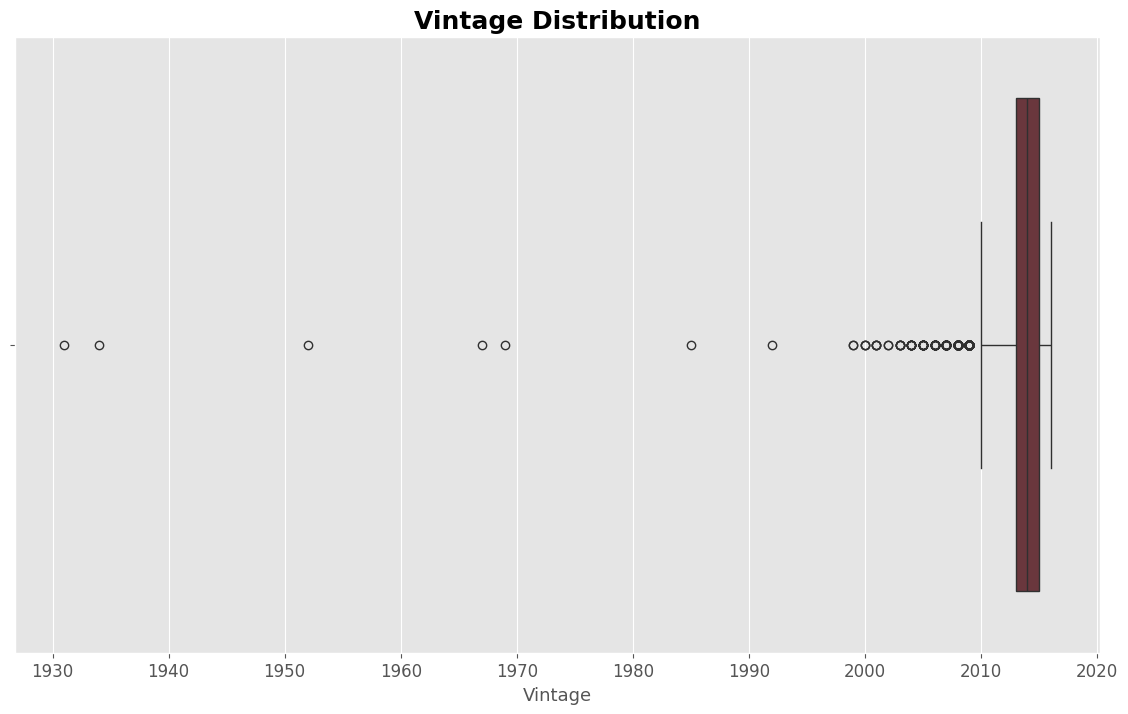

In [17]:
# Vintage Distribution Plot
plt.figure(figsize=(14,8))
sns.boxplot(x=vintage_df['vintage'], vert=False, color='#722F37')
plt.title("Vintage Distribution", fontsize=18, fontweight='bold')
plt.xlabel("Vintage", fontsize=13)
plt.xticks(np.arange(1930,2021,10), fontsize=12)
plt.yticks(fontsize=12)
plt.gca().margins(x=0.05)
plt.show()

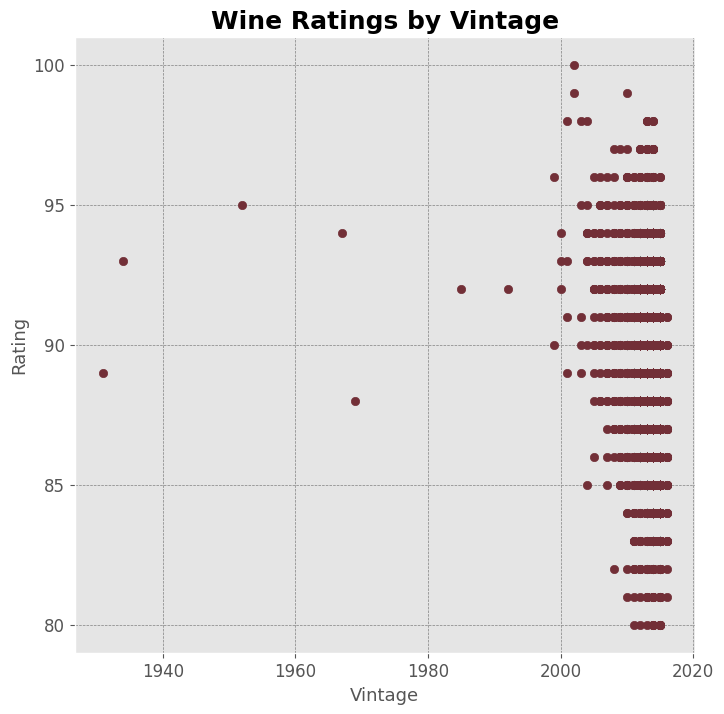

In [18]:
# Vintage By Rating Scatterplot
plt.figure(figsize=(8,8))
plt.scatter(x = vintage_df['vintage'], y = vintage_df['rating'], color='#722F37')
plt.title("Wine Ratings by Vintage", fontsize=18, fontweight='bold')
plt.xlabel("Vintage", fontsize=13)
plt.ylabel("Rating", fontsize=13)
plt.yticks(np.arange(80,101,5),fontsize=12)
plt.xticks(fontsize=12)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.gca().margins(x=0.05, y=0.05)
plt.show()

In [19]:
# Remove Outliers
qs = np.quantile(vintage_df['vintage'], [0.25, 0.5, 0.75])
minmax_range = qs[2]-qs[0]
maximum = qs[2]+1.5*minmax_range
minimum = qs[0]-1.5*minmax_range
minimum, maximum

(2010.0, 2018.0)

In [20]:
# Data Filterning on Vintage
xout_vint_df = vintage_df[(vintage_df['vintage'] <= maximum) & (vintage_df['vintage'] >= minimum)].copy(deep=True)
xout_vint_df

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015.0,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014.0,Château Lauretan
2,14.3,Red,US,"Dark and musky, this is an unabashedly earthy ...",Reserve,50.0,85,Oregon,Southern Oregon,Southern Oregon,Troon 2014 Reserve G-S-M (Southern Oregon),https://www.winemag.com/buying-guide/troon-201...,G-S-M,2014.0,Troon
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013.0,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014.0,Narmada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14924,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015.0,Netzl
14925,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014.0,Napa Cellars
14926,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014.0,Millbrook
14927,13.0,Rose,France,"Red-berry fruits dominate this crisp, clear wi...",Frais et Délicat,13.0,88,Provence,Coteaux d'Aix-en-Provence,NaN,Moncigale 2015 Frais et Délicat Rosé (Coteaux ...,https://www.winemag.com/buying-guide/moncigale...,Rosé,2015.0,Moncigale


In [21]:
xout_vint_df['vintage'].value_counts(dropna=False)

,count
vintage,
2014.0,4982
2015.0,3840
2013.0,3410
2012.0,1508
2011.0,502
2010.0,327
2016.0,55


In [22]:
# Vintage Column Summary Statistics After Filtering
xout_vint_df[['vintage']].describe()

,vintage
count,14624.000000
mean,2013.638266
std,1.207989
min,2010.000000
25%,2013.000000
50%,2014.000000
75%,2015.000000
max,2016.000000


In [23]:
# Mean Ratings For Years After 2010
xout_vint_df['vintage'] = pd.to_numeric(xout_vint_df['vintage'], errors='coerce')
xout_vint_df = xout_vint_df[['vintage','rating']]
xout_vint_avg_df = xout_vint_df.groupby('vintage').mean().sort_values(by='rating', ascending=False).copy()
xout_vint_avg_df

,rating
vintage,
2013.0,89.858358
2010.0,89.813456
2012.0,89.624005
2011.0,89.539841
2014.0,89.215175
2015.0,88.090885
2016.0,86.654545


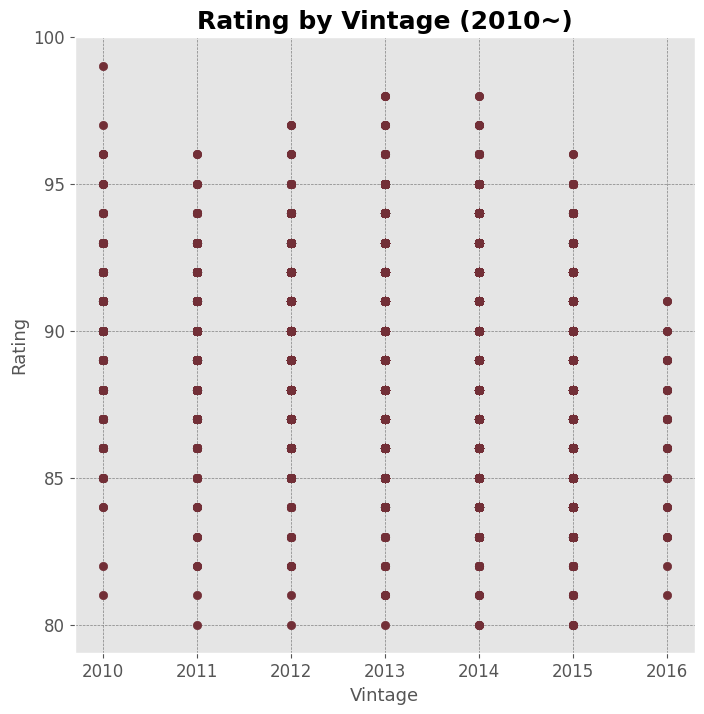

In [24]:
# Mean Rating vs. Vintage After 2010
plt.figure(figsize=(8,8))
plt.scatter(x = xout_vint_df['vintage'], y = xout_vint_df['rating'], color='#722F37')
plt.title("Rating by Vintage (2010~)", fontsize=18, fontweight='bold')
plt.xlabel("Vintage", fontsize=13)
plt.ylabel("Rating", fontsize=13)
plt.yticks(np.arange(80,101,5), fontsize=12)
plt.xticks(fontsize=12)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()

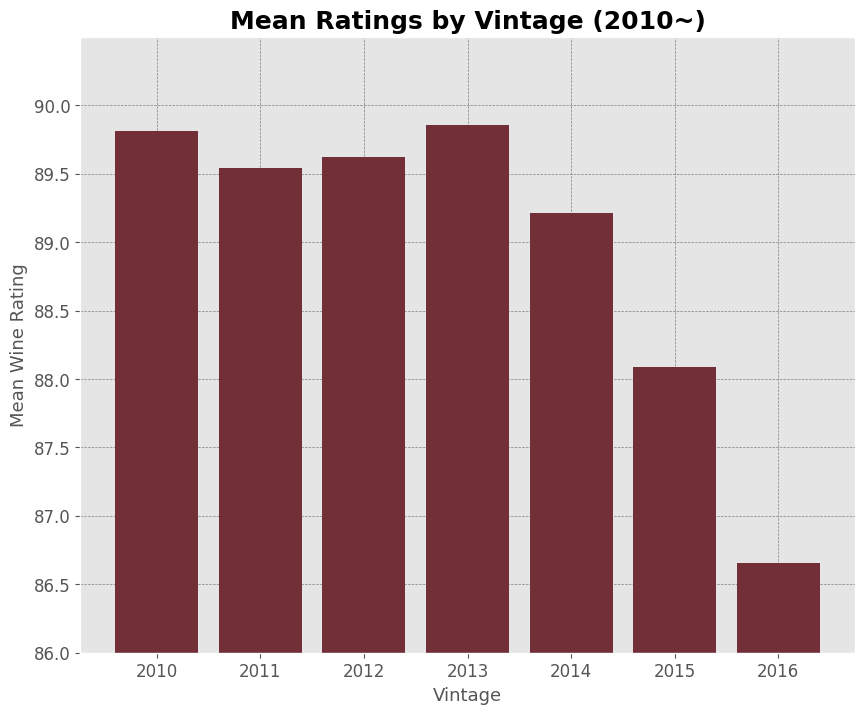

In [25]:
# Mean Ratings For Vintage After 2010
plt.figure(figsize=(10,8))
plt.bar(xout_vint_avg_df.index, xout_vint_avg_df['rating'], color = '#722F37')
plt.title("Mean Ratings by Vintage (2010~)", fontsize=18, fontweight='bold')
plt.xlabel("Vintage", fontsize=13)
plt.ylabel("Mean Wine Rating", fontsize=13)
plt.ylim([86, 90.5])
plt.yticks(np.arange(86,90.5,0.5), fontsize=12)
plt.xticks(fontsize=12)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.gca().margins(x=0.05, y=0.05)
plt.show()

#**Rating vs. Category Analysis**

In [26]:
# Create separate dataframe for Rating vs. Category Analysis
category_df = wine_df.copy(deep=True)
category_df = category_df.dropna(subset=['category']).reset_index(drop=True)
category_df

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015.0,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014.0,Château Lauretan
2,14.3,Red,US,"Dark and musky, this is an unabashedly earthy ...",Reserve,50.0,85,Oregon,Southern Oregon,Southern Oregon,Troon 2014 Reserve G-S-M (Southern Oregon),https://www.winemag.com/buying-guide/troon-201...,G-S-M,2014.0,Troon
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013.0,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014.0,Narmada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15455,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015.0,Netzl
15456,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014.0,Napa Cellars
15457,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014.0,Millbrook
15458,13.0,Rose,France,"Red-berry fruits dominate this crisp, clear wi...",Frais et Délicat,13.0,88,Provence,Coteaux d'Aix-en-Provence,NaN,Moncigale 2015 Frais et Délicat Rosé (Coteaux ...,https://www.winemag.com/buying-guide/moncigale...,Rosé,2015.0,Moncigale


In [27]:
# Category column Summary Statistics
category_df[['category']].describe()

,category
count,15460
unique,7
top,Red
freq,9150


In [28]:
category_df['category'].value_counts()

,count
category,
Red,9150
White,4643
Sparkling,764
Rose,690
Dessert,144
Port/Sherry,58
Fortified,11


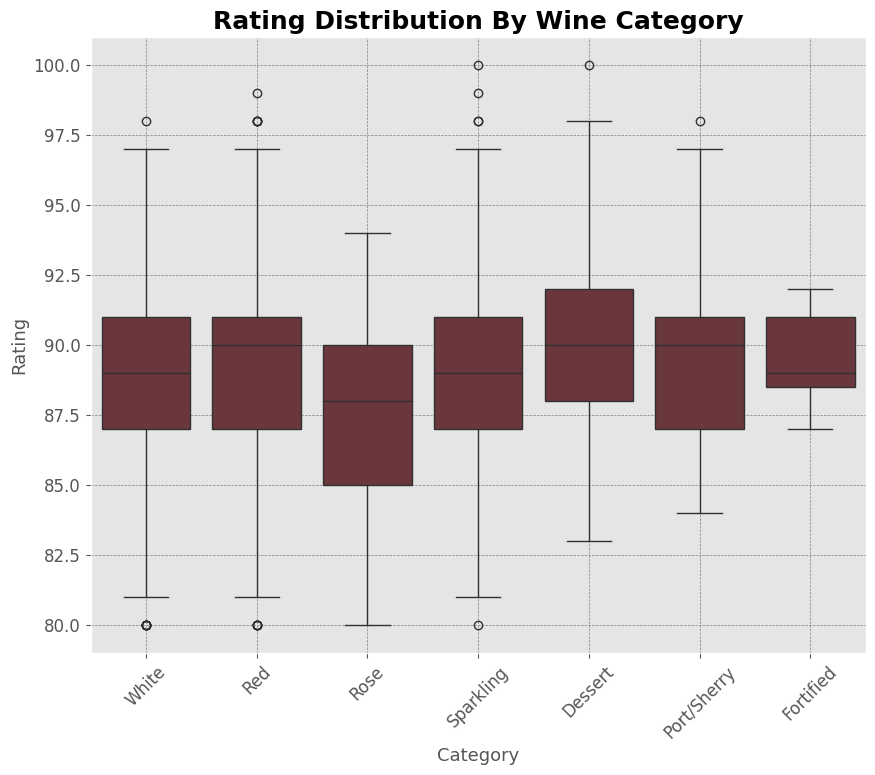

In [29]:
# Rating Distribution For Each Category of Wine
plt.figure(figsize=(10,8))
sns.boxplot(x='category', y='rating', data=category_df, color='#722F37')
plt.title('Rating Distribution By Wine Category', fontsize=18, fontweight='bold')
plt.xlabel("Category", fontsize=13)
plt.ylabel("Rating", fontsize=13)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()

In [30]:
# Mean Calculation for Each Wine Category
category_df = category_df[['category','rating']]
cat_avg_df = category_df[['category','rating']].groupby('category').mean().sort_values(by='rating', ascending=False)
cat_avg_df

,rating
category,
Dessert,90.187500
Fortified,89.636364
Port/Sherry,89.448276
Red,89.378798
Sparkling,89.066754
White,88.860866
Rose,87.475362


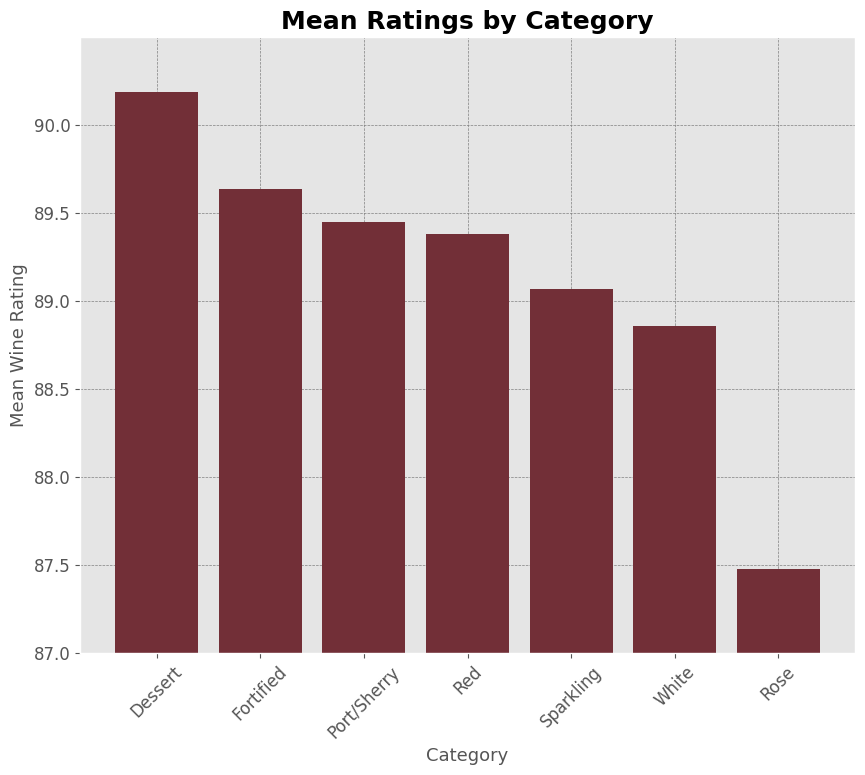

In [31]:
# Mean Ratings for Each Wine Category
plt.figure(figsize=(10,8))
plt.bar(cat_avg_df.index, cat_avg_df['rating'], color = '#722F37')
plt.title("Mean Ratings by Category", fontsize=18, fontweight='bold')
plt.xlabel("Category", fontsize=13)
plt.ylabel("Mean Wine Rating", fontsize=13)
plt.ylim([87, 90.5])
plt.yticks(np.arange(87,90.5,0.5), fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.gca().margins(x=0.05, y=0.05)
plt.show()

#**Rating vs. Varietal Analysis**

In [32]:
# Create separate dataframe for Rating vs. Varietal Analysis
varietal_df = wine_df.copy(deep=True)
varietal_df = varietal_df.dropna(subset=['varietal']).reset_index(drop=True)
varietal_df

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015.0,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014.0,Château Lauretan
2,14.3,Red,US,"Dark and musky, this is an unabashedly earthy ...",Reserve,50.0,85,Oregon,Southern Oregon,Southern Oregon,Troon 2014 Reserve G-S-M (Southern Oregon),https://www.winemag.com/buying-guide/troon-201...,G-S-M,2014.0,Troon
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013.0,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014.0,Narmada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15455,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015.0,Netzl
15456,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014.0,Napa Cellars
15457,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014.0,Millbrook
15458,13.0,Rose,France,"Red-berry fruits dominate this crisp, clear wi...",Frais et Délicat,13.0,88,Provence,Coteaux d'Aix-en-Provence,NaN,Moncigale 2015 Frais et Délicat Rosé (Coteaux ...,https://www.winemag.com/buying-guide/moncigale...,Rosé,2015.0,Moncigale


In [33]:
# Wine Varietal Summary Statistics
varietal_df[['varietal']].describe()

,varietal
count,15460
unique,381
top,Pinot Noir
freq,1781


In [34]:
varietal_df['varietal'].value_counts(dropna=False)

,count
varietal,
Pinot Noir,1781
Chardonnay,1391
Cabernet Sauvignon,981
Red Blend,977
Bordeaux-style Red Blend,819
...,...
Carignan-Syrah,1
Lambrusco di Sorbara,1
Vespolina,1


In [35]:
# Data Filtering
varietal_df = varietal_df.groupby('varietal').filter(lambda x : len(x)>154)
varietal_df

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015.0,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014.0,Château Lauretan
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013.0,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014.0,Narmada
5,13.5,Red,Australia,"Cranberries and pie cherries give a crisp, alm...",The Little Villager,18.0,84,South Australia,Adelaide Hills,NaN,Stable Hill 2013 The Little Villager Pinot Noi...,https://www.winemag.com/buying-guide/stable-hi...,Pinot Noir,2013.0,Stable Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15454,14.5,Red,US,"An extremely, deep, almost black color is the ...",The One Black,15.0,89,California,North Coast,North Coast,Noble Vines 2013 The One Black Red (North Coast),https://www.winemag.com/buying-guide/noble-vin...,Red Blend,2013.0,Noble Vines
15455,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015.0,Netzl
15456,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014.0,Napa Cellars
15457,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014.0,Millbrook


In [36]:
# Mean Rating Calculation for Each Wine Varietal
varietal_avg_df = varietal_df[['varietal','rating']].groupby('varietal').mean().sort_values(by='rating', ascending=False)
varietal_avg_df

,rating
varietal,
Grüner Veltliner,90.781659
Syrah,90.470226
Pinot Noir,90.272880
Riesling,90.143760
Champagne Blend,90.137931
Nebbiolo,89.652021
Zinfandel,89.522581
Cabernet Sauvignon,89.456677
Chardonnay,89.348670


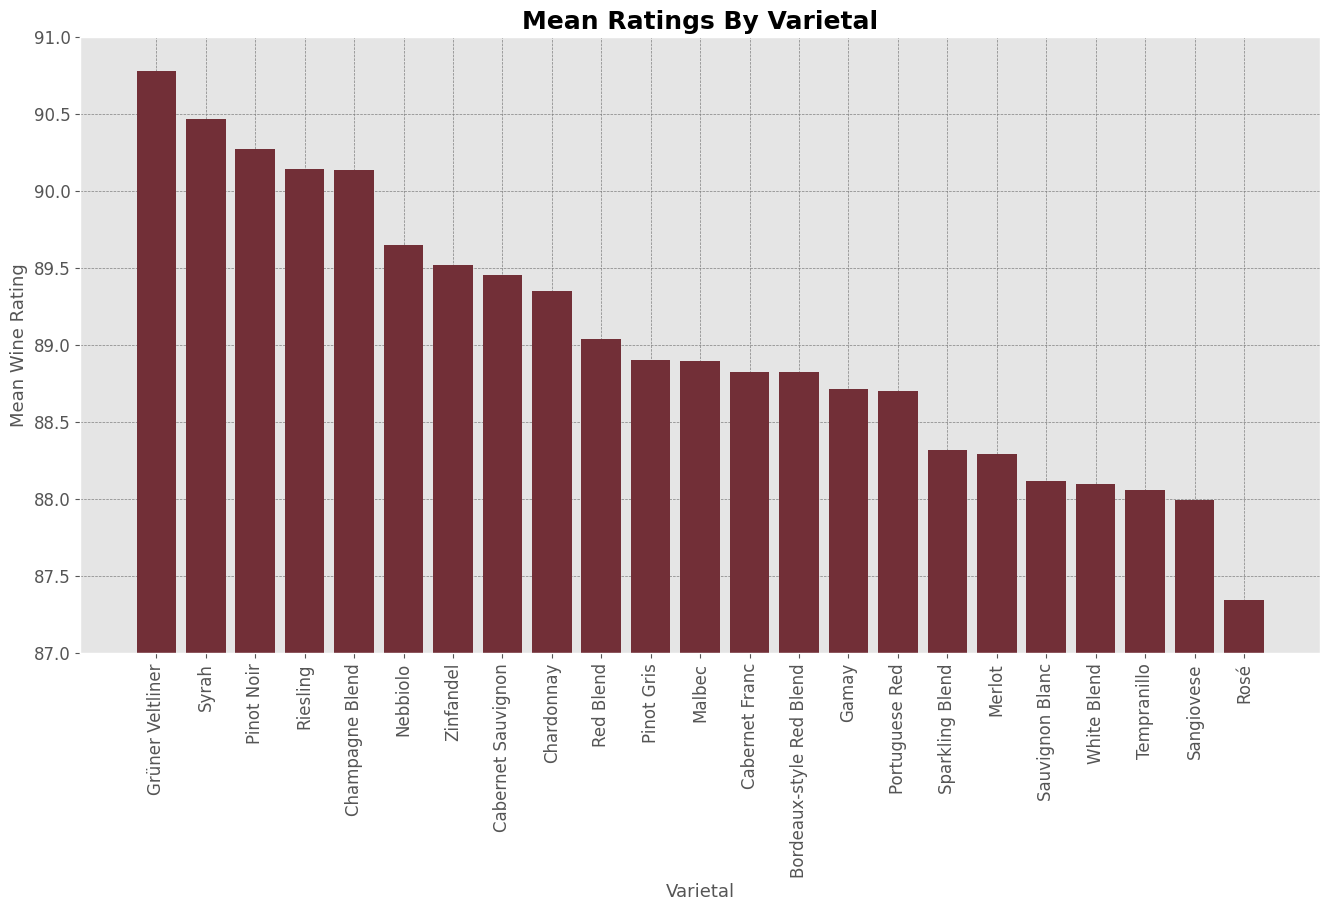

In [37]:
# Mean Ratings for Each Wine Varietal
plt.figure(figsize=(16,8))
varieties = varietal_avg_df.index
ratings = varietal_avg_df['rating']
plt.bar(varietal_avg_df.index, varietal_avg_df['rating'], color = '#722F37')
plt.title("Mean Ratings By Varietal", fontsize=18, fontweight='bold')
plt.xlabel("Varietal", fontsize=13)
plt.ylabel("Mean Wine Rating", fontsize=13)
plt.ylim([87, 91])
plt.xticks(fontsize=12, rotation=90)
plt.yticks(np.arange(87,91.5,0.5), fontsize=12)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()

#**Rating vs. Country of Production Analysis**

In [38]:
# Create separate dataframe for Rating vs. Country of Production Analysis
country_df = wine_df.copy(deep=True)
country_df = country_df.dropna(subset=['country']).reset_index(drop=True)
country_df

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015.0,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014.0,Château Lauretan
2,14.3,Red,US,"Dark and musky, this is an unabashedly earthy ...",Reserve,50.0,85,Oregon,Southern Oregon,Southern Oregon,Troon 2014 Reserve G-S-M (Southern Oregon),https://www.winemag.com/buying-guide/troon-201...,G-S-M,2014.0,Troon
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013.0,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014.0,Narmada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15455,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015.0,Netzl
15456,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014.0,Napa Cellars
15457,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014.0,Millbrook
15458,13.0,Rose,France,"Red-berry fruits dominate this crisp, clear wi...",Frais et Délicat,13.0,88,Provence,Coteaux d'Aix-en-Provence,NaN,Moncigale 2015 Frais et Délicat Rosé (Coteaux ...,https://www.winemag.com/buying-guide/moncigale...,Rosé,2015.0,Moncigale


In [39]:
# Each Country of Production column Summary Statistics
country_df[['country']].describe()

,country
count,15460
unique,28
top,US
freq,6584


In [40]:
# Data Filtering
country_df = country_df.groupby('country').filter(lambda x : len(x)>130)
country_df['country'].value_counts(dropna=False)

,count
country,
US,6584
France,3129
Italy,1778
Portugal,757
Spain,744
Austria,492
Argentina,451
Chile,396
Australia,295


In [41]:
# Mean Rating Calculation for Each Country of Production
country_avg_df = country_df[['country','rating']].groupby('country').mean().sort_values(by='rating', ascending=False)
country_avg_df

,rating
country,
Austria,90.963415
Germany,90.384615
Australia,89.969492
New Zealand,89.811594
US,89.615128
Italy,88.959505
France,88.803771
Portugal,88.159841
Argentina,88.053215


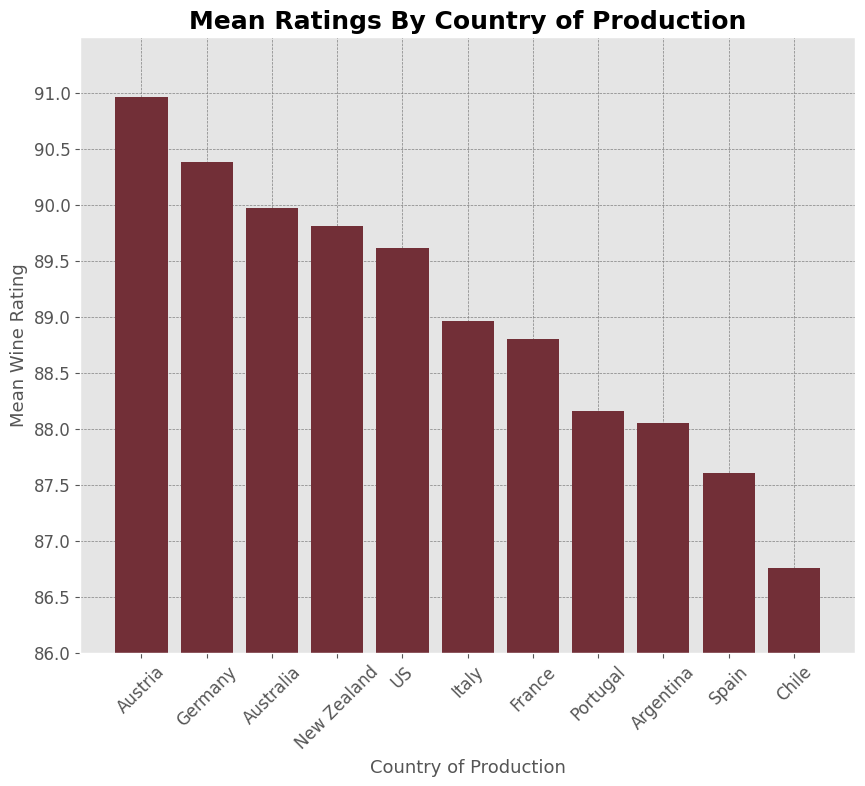

In [42]:
# Mean Rating for Each Country of Production
plt.figure(figsize=(10,8))
plt.bar(country_avg_df.index, country_avg_df['rating'], color = '#722F37')
plt.title("Mean Ratings By Country of Production", fontsize=18, fontweight='bold')
plt.xlabel("Country of Production", fontsize=13)
plt.ylabel("Mean Wine Rating", fontsize=13)
plt.ylim([86, 91.5])
plt.yticks(np.arange(86,91.5,0.5), fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()

#**Rating vs. Region of Production Analysis**

In [43]:
# Create separate dataframe for Rating vs. Region of Production Analysis
region_df = wine_df.copy(deep=True)
region_df = region_df.dropna(subset=['region']).reset_index(drop=True)
region_df

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015.0,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014.0,Château Lauretan
2,14.3,Red,US,"Dark and musky, this is an unabashedly earthy ...",Reserve,50.0,85,Oregon,Southern Oregon,Southern Oregon,Troon 2014 Reserve G-S-M (Southern Oregon),https://www.winemag.com/buying-guide/troon-201...,G-S-M,2014.0,Troon
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013.0,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014.0,Narmada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015.0,Netzl
15387,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014.0,Napa Cellars
15388,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014.0,Millbrook
15389,13.0,Rose,France,"Red-berry fruits dominate this crisp, clear wi...",Frais et Délicat,13.0,88,Provence,Coteaux d'Aix-en-Provence,NaN,Moncigale 2015 Frais et Délicat Rosé (Coteaux ...,https://www.winemag.com/buying-guide/moncigale...,Rosé,2015.0,Moncigale


In [44]:
# Region of Production column Summary Statistics
region_df[['region']].describe()

,region
count,15391
unique,221
top,California
freq,4230


In [45]:
# Data Filtering
region_df = region_df.groupby('region').filter(lambda x : len(x)>120)
region_df['region'].value_counts(dropna=False)

,count
region,
California,4230
Washington,1111
Bordeaux,733
Burgundy,728
Oregon,700
Piedmont,608
Tuscany,498
Northern Spain,466
Alsace,414


In [46]:
# Mean Rating Calculation for Each Region of Production
region_avg_df = region_df[['region','rating']].groupby('region').mean().sort_values(by='rating', ascending=False)
region_avg_df.rename(index={'Sicily &amp; Sardinia':'Sicily & Sardinia'},inplace=True)
region_avg_df

,rating
region,
Champagne,90.617778
Mosel,90.194444
South Australia,90.112500
California,89.951300
Provence,89.906250
Veneto,89.774194
Burgundy,89.758242
Piedmont,89.560855
Washington,89.495950


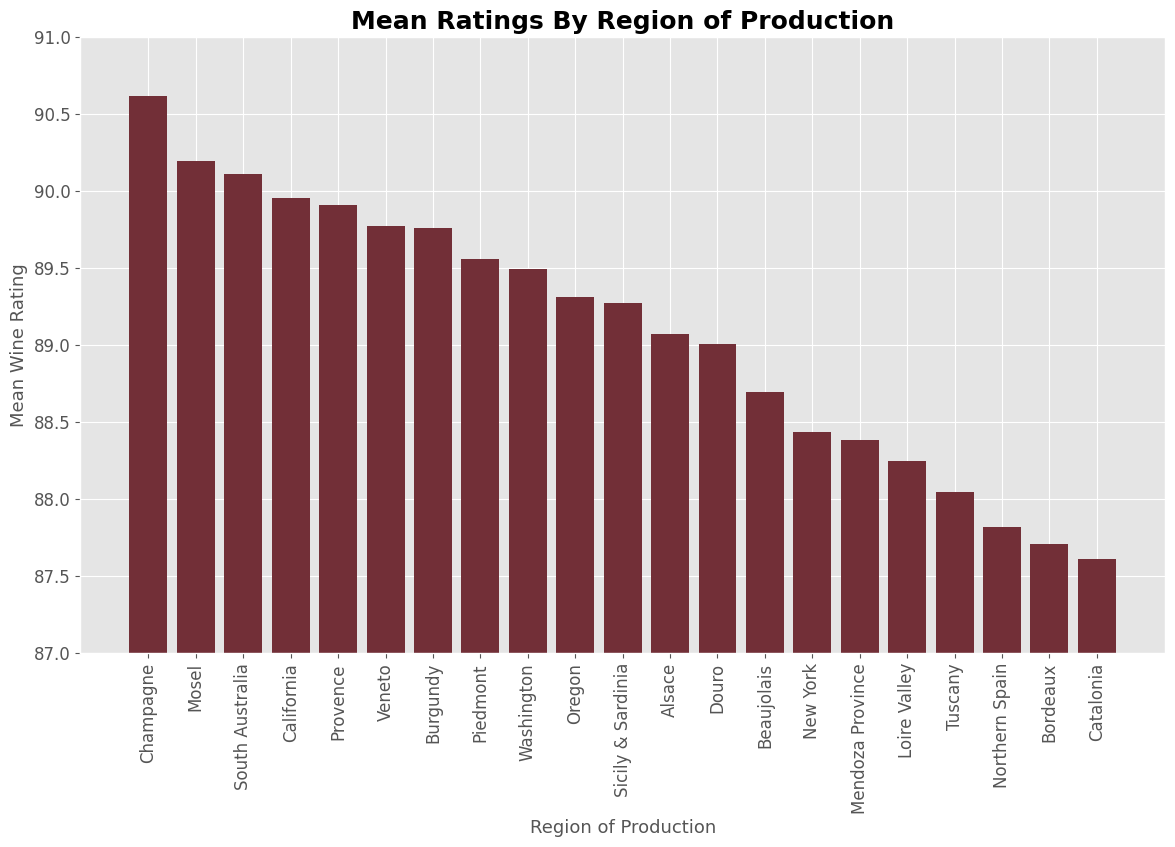

In [47]:
# Mean Rating Calculation for Each Region of Production
plt.figure(figsize=(14,8))
plt.bar(region_avg_df.index, region_avg_df['rating'], color = '#722F37')
plt.title("Mean Ratings By Region of Production", fontsize=18, fontweight='bold')
plt.xlabel("Region of Production", fontsize=13)
plt.ylabel("Mean Wine Rating", fontsize=13)
plt.xticks(fontsize=12, rotation=90)
plt.ylim([87, 91])
plt.yticks(np.arange(87,91.5,0.5), fontsize=12)
plt.show()

#**Rating vs. Winery Analysis**

In [48]:
# Create separate dataframe for Rating vs. Winery Analysis
winery_df = wine_df.copy(deep=True)
winery_df = winery_df.dropna(subset=['winery']).reset_index(drop=True)
winery_df

,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,12.7,White,US,There's a bit of spritz and very light flavors...,NaN,18.0,85,Oregon,Oregon Other,Oregon,Harry &amp; David 2015 Pinot Gris (Oregon),https://www.winemag.com/buying-guide/harry-dav...,Pinot Gris,2015.0,Harry &amp; David
1,13.0,Red,France,"On an eminence above the river Garonne, this e...",NaN,17.0,85,Bordeaux,Bordeaux Supérieur,NaN,Château Lauretan 2014 Bordeaux Supérieur,https://www.winemag.com/buying-guide/chateau-l...,Bordeaux-style Red Blend,2014.0,Château Lauretan
2,14.3,Red,US,"Dark and musky, this is an unabashedly earthy ...",Reserve,50.0,85,Oregon,Southern Oregon,Southern Oregon,Troon 2014 Reserve G-S-M (Southern Oregon),https://www.winemag.com/buying-guide/troon-201...,G-S-M,2014.0,Troon
3,14.4,Red,US,"This is a thick, syrupy-rich wine that traffic...",Cuvée,28.0,85,California,Sonoma,Russian River Valley,Merriam 2013 Cuvée Pinot Noir (Russian River V...,https://www.winemag.com/buying-guide/merriam-2...,Pinot Noir,2013.0,Merriam
4,13.9,Red,US,This wine has intense aromas of blueberry pie ...,NaN,27.0,84,Virginia,Virginia,NaN,Narmada 2014 Cabernet Sauvignon (Virginia),https://www.winemag.com/buying-guide/narmada-2...,Cabernet Sauvignon,2014.0,Narmada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15455,12.0,White,Austria,A fragrant nose is composed of lime zest and f...,NaN,12.0,89,Carnuntum,NaN,NaN,Netzl 2015 Grüner Veltliner (Carnuntum),https://www.winemag.com/buying-guide/netzl-201...,Grüner Veltliner,2015.0,Netzl
15456,14.2,Red,US,"A sleek, medium-bodied wine that's made in lar...",Classic Collection,24.0,89,California,Napa,Napa Valley,Napa Cellars 2014 Classic Collection Pinot Noi...,https://www.winemag.com/buying-guide/napa-cell...,Pinot Noir,2014.0,Napa Cellars
15457,13.0,White,US,"While not Millbrook's premium Chardonnay, this...",NaN,17.0,89,New York,New York Other,New York,Millbrook 2014 Chardonnay (New York),https://www.winemag.com/buying-guide/millbrook...,Chardonnay,2014.0,Millbrook
15458,13.0,Rose,France,"Red-berry fruits dominate this crisp, clear wi...",Frais et Délicat,13.0,88,Provence,Coteaux d'Aix-en-Provence,NaN,Moncigale 2015 Frais et Délicat Rosé (Coteaux ...,https://www.winemag.com/buying-guide/moncigale...,Rosé,2015.0,Moncigale


In [49]:
# Winery column Summary Statistics
winery_df[['winery']].describe()

,winery
count,15460
unique,5099
top,Georges Duboeuf
freq,44


In [50]:
# Data Filtering
winery_df = winery_df.groupby('winery').filter(lambda x : len(x)>17)
winery_df['winery'].value_counts(dropna=False)

,count
winery,
Georges Duboeuf,44
Louis Latour,38
Albert Bichot,33
Testarossa,32
Chanson Père et Fils,31
Jean-Luc and Paul Aegerter,30
Almquist,29
Domaines Devillard,28
Naggiar,25


In [51]:
# Mean Rating Calculation for Each Winery
winery_avg_df = winery_df[['winery','rating']].groupby('winery').mean().sort_values(by='rating', ascending=False)
winery_avg_df.rename(index={'Jean-Luc and Paul Aegerter':'Jean-Luc & Paul Aegerter','L. Tramier &amp; Fils': 'L. Tramier & Fils','Wines &amp; Winemakers':'Wines & Winemakers'},inplace=True)
winery_avg_df

,rating
winery,
Lynmar,93.650000
Domaine Serene,92.550000
Domaine Faiveley,92.500000
Iron Horse,92.333333
Olivier Leflaive,92.190476
Testarossa,92.000000
Albert Bichot,91.818182
Louis Latour,91.500000
Chanson Père et Fils,91.258065


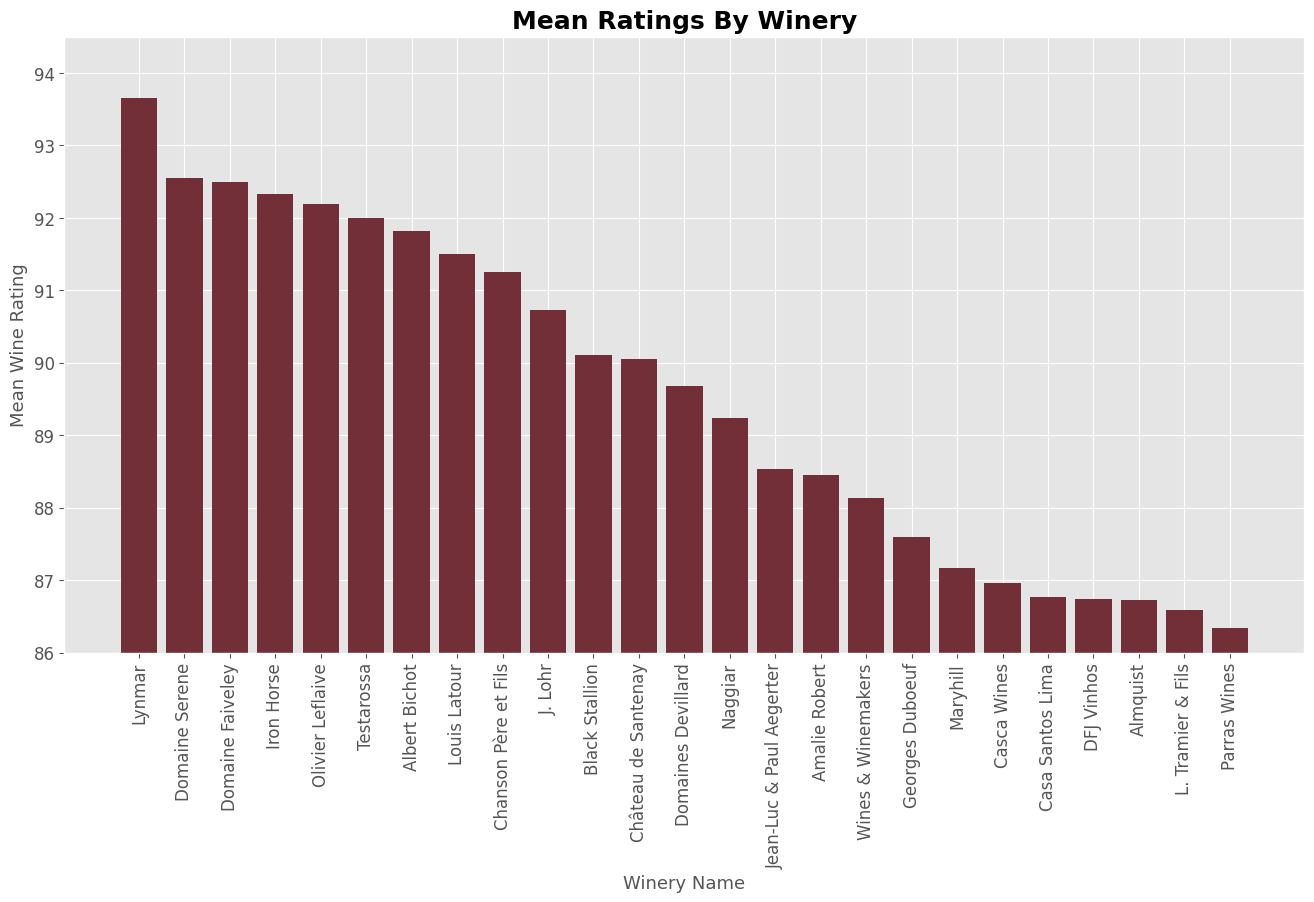

In [52]:
# Mean Rating for Each Winery
plt.figure(figsize=(16,8))
plt.bar(winery_avg_df.index, winery_avg_df['rating'], color = '#722F37')
plt.xticks(rotation=90)
plt.title("Mean Ratings By Winery", fontsize=18, fontweight='bold')
plt.xlabel("Winery Name", fontsize=13)
plt.ylabel("Mean Wine Rating", fontsize=13)
plt.ylim([86, 94.5])
plt.xticks(fontsize=12)
plt.yticks(np.arange(86,94.5,1),fontsize=12)
plt.show()